<p align="center">
<img src="https://github.com/adelnehme/python-crash-course-an-introduction-to-spreadsheet-users/blob/main/assets/dc_logo.png?raw=true" alt = "DataCamp Amazon icon" width="65%">
</p>


## **Python Crash Course—An Introduction to Spreadsheet Users**


### **Key session takeaways**

* Import data into Python using `pandas` — Python’s most popular data analysis package.
* Filter, add new columns, and analyse datasets using pandas.
* Present data visualizations using `matplotlib` and `seaborn` — Python's most popular data visualization packages.

### **The Dataset**

The dataset to be used in this training is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `listing_added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `number_of_stays`: Total number of stays thus far

### **Questions to answer**

- **Question 1:** What is the distribution of price per room type?
- **Question 2:** What is the number of listings per borough?
- **Question 3:** What is the number of listings per year?
- **Question 4:** What is the number of listings per year in each borough?


## **Getting started**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*To import a CSV file into* `pandas` *, we use*  `data = pd.read_csv(file_path)` *check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for importing other data types*


In [ ]:
# Read in the dataset
airbnb = pd.read_csv('https://raw.githubusercontent.com/adelnehme/python-crash-course-an-introduction-to-spreadsheet-users/main/data/airbnb.csv', index_col = 0)

*Some common methods needed to get a better understanding of your DataFrames:*

- `data.head()` *prints the first 5 rows*
- `data.describe()` *prints the distribution of numeric columns*
- `data.info()` *prints the missingness and data types of columns*

In [ ]:
# Inspect header of dataset
airbnb.head()

,listing_id,description,host_id,neighbourhood_full,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private Room,45$,10,0.70,85,4.100954,12.0,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113.0,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire place,135$,1,1.00,145,3.367600,1.2,2018-12-25
2,6425850,"Spacious, charming studio",32715865.0,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire place,86$,5,0.13,0,4.763203,6.0,2017-03-20
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private Room,160$,23,2.29,102,3.822591,27.6,2020-10-23
4,271954,Beautiful brownstone apartment,1423798.0,"Manhattan, Greenwich Village","(40.73388, -73.99452)",Entire place,150$,203,2.22,300,4.478396,243.6,2018-12-15


* _**Problem 1:** Taking a look at the_ `price` _column, it seems it's not a numeric data type_
* _**Problem 2:** We need to extract the Borough from the_ `neighbourhood_full` _column_

In [ ]:
# Check description of dataset
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays
count,7.734000e+03,7.727000e+03,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,1.838769e+07,6.481466e+07,28.355185,1.353746,114.546160,4.012199,34.026222
std,1.069230e+07,7.610154e+07,46.962275,1.613229,129.862583,0.574812,56.354729
min,3.831000e+03,2.787000e+03,1.000000,0.010000,0.000000,3.000633,1.200000
25%,9.028764e+06,7.155462e+06,3.000000,0.200000,0.000000,3.518918,3.600000
50%,1.930978e+07,2.951896e+07,9.000000,0.710000,54.000000,4.024223,10.800000
75%,2.790623e+07,1.017516e+08,32.000000,2.000000,230.000000,4.514173,38.400000
max,3.635113e+07,2.733615e+08,510.000000,16.220000,365.000000,4.999561,612.000000


In [ ]:
# Check information of dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          7734 non-null   int64  
 1   description         7733 non-null   object 
 2   host_id             7727 non-null   float64
 3   neighbourhood_full  7734 non-null   object 
 4   coordinates         7734 non-null   object 
 5   room_type           7734 non-null   object 
 6   price               7734 non-null   object 
 7   number_of_reviews   7734 non-null   int64  
 8   reviews_per_month   7734 non-null   float64
 9   availability_365    7734 non-null   int64  
 10  rating              7734 non-null   float64
 11  number_of_stays     7734 non-null   float64
 12  listing_added       7734 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 845.9+ KB


* _**Problem 3:** From the output, it seems that we have missing data in_ `host_id`, `description` columns.
* _**Problem 4:** We need to convert_ `listing_added` _column to date column._

## **Data Cleaning**

### **Data cleaning to-do list!**

_Data Type Problems_

- _**Task 1**: Remove_ `$` _from_ `price` _and convert it to_ `float`
- _**Task 2**: Convert_ `listing_added` _to_ `datetime`

<br>

_Text/categorical data problems:_

- _**Task 3**: Extract borough from_ `neighbourhood_full`

<br>

_Dealing with missing data:_

- _**Task 4**: Deal with missing data in_ `host_id` _and_ `description` _columns_

<br>


##### **Task 1:** Remove `$` from `price` and convert it to `float`


_To remove a character from a string column, we can use:_ 
```
data['column_name'] = data['column_name'].str.strip(character)
```

_To convert a numeric column to a float, we can use:_

```
data['column_name'] = data['column_name'].astype('float')
```

In [ ]:
# Strip $ from price column
airbnb['price'] = airbnb['price'].str.strip('$')

# Convert price column to float
airbnb['price'] = airbnb['price'].astype('float')

# Print header again
airbnb.head()

,listing_id,description,host_id,neighbourhood_full,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private Room,45.0,10,0.70,85,4.100954,12.0,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113.0,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire place,135.0,1,1.00,145,3.367600,1.2,2018-12-25
2,6425850,"Spacious, charming studio",32715865.0,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire place,86.0,5,0.13,0,4.763203,6.0,2017-03-20
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private Room,160.0,23,2.29,102,3.822591,27.6,2020-10-23
4,271954,Beautiful brownstone apartment,1423798.0,"Manhattan, Greenwich Village","(40.73388, -73.99452)",Entire place,150.0,203,2.22,300,4.478396,243.6,2018-12-15


##### **Task 2:** Convert `listing_added` to `datetime`

_To convert a date column to_ `datetime`_, we can use:_


```
data['column_name'] = pd.to_datetime(data['column_name'])
```

In [ ]:
# Convert listing_added to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'])

# Print info again
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   listing_id          7734 non-null   int64         
 1   description         7733 non-null   object        
 2   host_id             7727 non-null   float64       
 3   neighbourhood_full  7734 non-null   object        
 4   coordinates         7734 non-null   object        
 5   room_type           7734 non-null   object        
 6   price               7734 non-null   float64       
 7   number_of_reviews   7734 non-null   int64         
 8   reviews_per_month   7734 non-null   float64       
 9   availability_365    7734 non-null   int64         
 10  rating              7734 non-null   float64       
 11  number_of_stays     7734 non-null   float64       
 12  listing_added       7734 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), obje

##### **Task 3:** Extract borough from `neighbourhood_full` column

_To split a column into multiple columns, we can use:_

```
split_data = data['column_name'].str.split(',', expand = True)
```


In [ ]:
# Create new DataFrame with split column
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(',', expand = True)

borough_neighbourhood

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Manhattan,Upper West Side
3,Manhattan,Lower East Side
4,Manhattan,Greenwich Village
...,...,...
7729,Manhattan,Harlem
7730,Manhattan,East Harlem
7731,Brooklyn,Clinton Hill
7732,Brooklyn,Clinton Hill


In [ ]:
# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]

# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Manhattan, Upper West Side",Manhattan,Upper West Side
3,"Manhattan, Lower East Side",Manhattan,Lower East Side
4,"Manhattan, Greenwich Village",Manhattan,Greenwich Village


In [ ]:
# Drop original neighbourhood_full column
airbnb.drop('neighbourhood_full', axis = 1 , inplace = True)

##### **Task 4:** Deal with missing values in `host_id` and `description` columns


_To count and drop missing values in a DataFrame, you can use the following:_

- `data.isna().sum()` _to count missing values
- `data.dropna()` _drops missing values_

In [ ]:
# Find missing values
airbnb.isna().sum()

listing_id           0
description          1
host_id              7
coordinates          0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
dtype: int64

In [22]:
# Drop missing values
airbnb = airbnb.dropna()
# Count missing values again
airbnb.isna().sum()

listing_id           0
description          0
host_id              0
coordinates          0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
rating               0
number_of_stays      0
listing_added        0
listing_year         0
dtype: int64



---

<center><h1> Q&A</h1> </center>

---





## **Data Analysis and Visualization**

##### **Question 1:** What is the distribution of price per room type?


<p align="center">
<img src="https://github.com/adelnehme/python-crash-course-an-introduction-to-spreadsheet-users/blob/main/assets/boxplot_image.png?raw=true" alt = "boxplot" width="65%">
</p>


_To create a boxplot using_ `seaborn` _we can use:_

- `sns.boxplot(x = , y = , data = )`
  - `x`: _column name on x-axis_
  - `y`: _column name on y-axis_
  - `data`: _data being used_
- `plt.title()`: _sets plot title_
- `plt.xlabel()`: _sets x-axis label_
- `plt.ylabel()`:_sets y-axis label_
- `plt.show()`:  _shows plot_


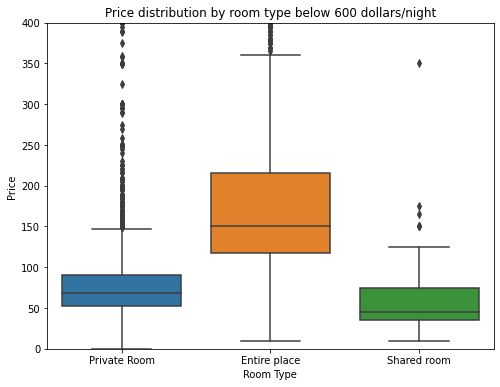

In [23]:
# Visualize price by room type
plt.figure(figsize = (8,6))

# Create plot
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)

# Set titles and labels of plot
plt.title('Price distribution by room type below 600 dollars/night')
plt.ylabel('Price')
plt.xlabel('Room Type')

# Set y-axis limit
plt.ylim(0,400)

# Show plot
plt.show()

##### **Question 2:** What are the number of listings per borough?

_To easily show the count of observations in each category using_`seaborn`_we can use:_

- `sns.countplot(x = , data = )`
  - `x`: _categorical column name on x-axis_
  - `data`: _data being used_
- `plt.title()`: _sets plot title_
- `plt.xlabel()`: _sets x-axis label_
- `plt.ylabel()`: _sets y-axis label_
- `plt.show()`: _shows plot_

In [25]:
# Count the amount of listings per borough
sns.countplot(x = 'borough', data = airbnb)

# Set titles and labels of plot
plt.title('Number of listings per Borough')
plt.ylabel('Number of listings')
plt.xlabel('Borough')

# Show plot
plt.show()

ValueError: Could not interpret input 'borough'

##### **Question 3:** What are the number of listings per year?

In [26]:
# Extract listing year column from listing_added column
airbnb['listing_year'] = airbnb['listing_added'].dt.year

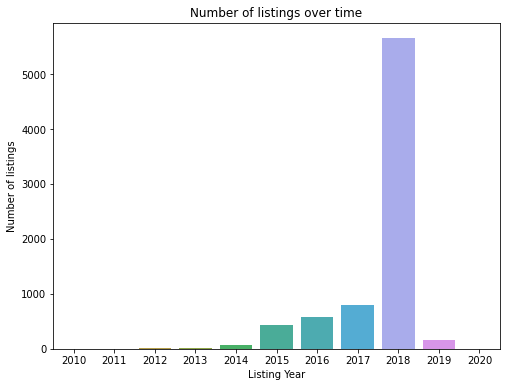

In [27]:
# Set figure size
plt.figure(figsize = (8,6))

# Count the number of listings per year
sns.countplot(x = 'listing_year', data = airbnb)

# Set titles and labels of plot
plt.title('Number of listings over time')
plt.ylabel('Number of listings')
plt.xlabel('Listing Year')

# Show plot
plt.show()

##### **Question 4:** What are the number of listings per year in each borough?

In [28]:
# Set figure size
plt.figure(figsize = (12,6))

# Count the number of listings per year for each borough
sns.countplot(x = 'listing_year', data = airbnb, hue = 'borough')

# Set titles and labels of plot
plt.title('Number of listings over time by borough')
plt.ylabel('Number of listings')
plt.xlabel('Listing Year')

# Show title
plt.show()

ValueError: Could not interpret input 'borough'

<Figure size 864x432 with 0 Axes>



---

<center><h1> Q&A</h1> </center>

---



